In [4]:
!pip install opencv-python

    100% |████████████████████████████████| 24.9MB 55kB/s  eta 0:00:01
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [19]:
!pip install scikit-image

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
import cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
def load_image(path, gray=False):
    '''
        return RGB or gray image
    '''
    print(path, gray)
    if gray:
        
        return cv2.imread(path, 0)
    else:
        return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

def write_image(path, image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return cv2.imwrite(path, image)
    
def show(x):
    plt.figure(figsize=(20, 20))
    plt.show(plt.imshow(x))

In [7]:
!ls data/1/*

data/1/IMG_9263_input.jpg    data/1/IMG_9263_output2.jpg
data/1/IMG_9263_output1.jpg  data/1/IMG_9263_output3.jpg


In [10]:
path_inputs = glob('data/train_data/*/*input.jpg')
path_1_outputs = glob('data/train_data/*/*output1.jpg')
path_2_outputs = glob('data/train_data/*/*output2.jpg')
path_3_outputs = glob('data/train_data/*/*output3.jpg')
path_2_outputs

['data/train_data/1/IMG_9263_output2.jpg',
 'data/train_data/2/IMG_9264_output2.jpg',
 'data/train_data/3/IMG_9265_output2.jpg']

In [19]:
!mkdir data/train

mkdir: data/train: File exists


In [21]:
from PIL import Image
img = Image.open(p2)

In [22]:
i = 0
for p1, p2, p3 in zip(path_inputs, path_1_outputs, path_2_outputs):
    im_input = load_image(p1)    
    im2 = load_image(p2, gray=True)
    im3 = load_image(p3, gray=True)
    print(im1.shape, im2.shape, im3.shape)
    #im4 = load_image(p4, gray=True)
    #im1_gray = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
    
    output = np.stack([im2, im2, im3], axis=-1)
    train_img = np.concatenate([im_input, output], axis=1)
#     show(train_img)
    write_image('data/train/{}.png'.format(i), train_img)
    i+=1

data/train_data/1/IMG_9263_input.jpg False
data/train_data/1/IMG_9263_output1.jpg True
data/train_data/1/IMG_9263_output2.jpg True
(2448, 3264, 3) (2448, 3264) (2448, 3264)
data/train_data/2/IMG_9264_input.jpg False
data/train_data/2/IMG_9264_output1.jpg True
data/train_data/2/IMG_9264_output2.jpg True
(2448, 3264, 3) (2448, 3264) (2448, 3264)
data/train_data/3/IMG_9265_input.jpg False
data/train_data/3/IMG_9265_output1.jpg True
data/train_data/3/IMG_9265_output2.jpg True
(2448, 3264, 3) (2448, 3264) (2448, 3264)


In [21]:
im4 = load_image('data/1/IMG_9263_output3.jpg', gray=True)

data/1/IMG_9263_output3.jpg True


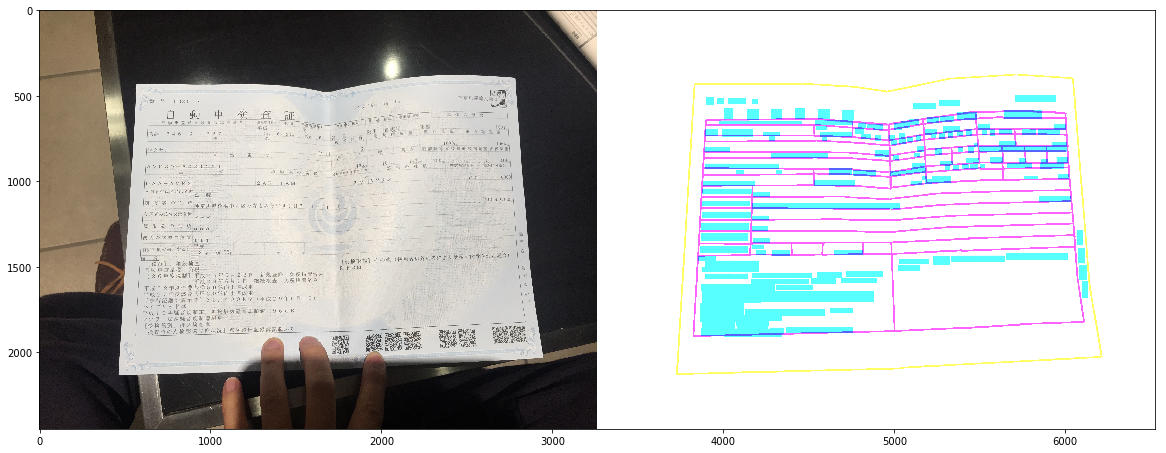

In [23]:
show(train_img)